# Project - EDA with Pandas Using the Boston Housing Data

## Introduction

In this section you've learned a lot about importing, cleaning up, analysing (using descriptive statistics) and visualizing data. In this more free form project you'll get a chance to practice all of these skills with the Boston Housing data set, which contains housing values in suburbs of Boston. The Boston Housing Data is commonly used by aspiring data scientists.

## Objectives

You will be able to:

* Load csv files using Pandas
* Find variables with high correlation
* Create box plots

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df=pd.read_csv('train.csv')

# Goals

Use your data munging and visualization skills to conduct an exploratory analysis of the dataset below. At minimum, this should include:

* Loading the data (which is stored in the file train.csv)
* Use built-in python functions to explore measures of centrality and dispersion for at least 3 variables
* Create *meaningful* subsets of the data using selection operations using `.loc`, `.iloc` or related operations. Explain why you used the chosen subsets and do this for 3 possible 2-way splits. State how you think the 2 measures of centrality and/or dispersion might be different for each subset of the data. Examples of potential splits:
    - Create a 2 new dataframes based on your existing data, where one contains all the properties next to the Charles river, and the other one contains properties that aren't.
    - Create 2 new datagrames based on a certain split for crime rate.
* Next, use histograms and scatterplots to see whether you observe differences for the subsets of the data. Make sure to use subplots so it is easy to compare the relationships.

In [29]:
#Use built in functions to explore centrality and dispersian 
vars=['crim','dis','ptratio','tax']
for var in vars:
    print(var,'median is: ',round(df[var].median(),2))
    print(var,'std is: ',round(df[var].std(),2))
    print(var,f'range is:{df[var].min()} to {df[var].max()}')
#df['crim'].median() , df['crim'].std() , df['crim']

crim median is:  0.26
crim std is:  7.35
crim range is:0.00632 to 73.5341
dis median is:  3.09
dis std is:  1.98
dis range is:1.1296 to 10.7103
ptratio median is:  19.0
ptratio std is:  2.15
ptratio range is:12.6 to 21.2
tax median is:  330.0
tax std is:  170.84
tax range is:188 to 711


In [31]:
# Create *meaningful* subsets of the data using selection operations using `.loc`, `.iloc` or related operations. 
# Explain why you used the chosen subsets and do this for 3 possible 2-way splits. 
#State how you think the 2 measures of centrality and/or dispersion might be different for each subset of the data. 
#Examples of potential splits:
#    - Create a 2 new dataframes based on your existing data, where one contains all the properties next to the Charles river,
# and the other one contains properties that aren't.
#    - Create 2 new datagrames based on a certain split for crime rate.

# Low vs HIGH CRIMTE RATE (vs median) 
# Median property values for high crime may be lower than low crime
df_crim_low=df.loc[df['crim']<df['crim'].median()]
print(df_crim_low.head())
df_crim_hi=df.loc[df['crim']>df['crim'].median()]
df_crim_hi.head()

#CLOSE VS FAR DISTANCE TO BUSINESS CENTERS 
# Median crime rate will be higher for suburbs farther from business center
df_bus_close = df.loc[df['dis'] < df['dis'].median()]
df_bus_far = df.loc[df['dis'] > df['dis'].median()]

#High vs low pupil teacher ratio 
# Median tax value will be higher for suburbs with lower pupil to teacher ratio
df_pt_high = df.loc[df['ptratio'] > df['ptratio'].median()] 
df_pt_low = df.loc[df['ptratio'] < df['ptratio'].median()] 

   ID     crim    zn  indus  chas    nox     rm   age     dis  rad  tax  \
0   1  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296   
1   2  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242   
2   4  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222   
3   5  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222   
4   7  0.08829  12.5   7.87     0  0.524  6.012  66.6  5.5605    5  311   

   ptratio   black  lstat  medv  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     18.7  394.63   2.94  33.4  
3     18.7  396.90   5.33  36.2  
4     15.2  395.60  12.43  22.9  


Text(0.5, 1.0, 'Low P:T Ratio')

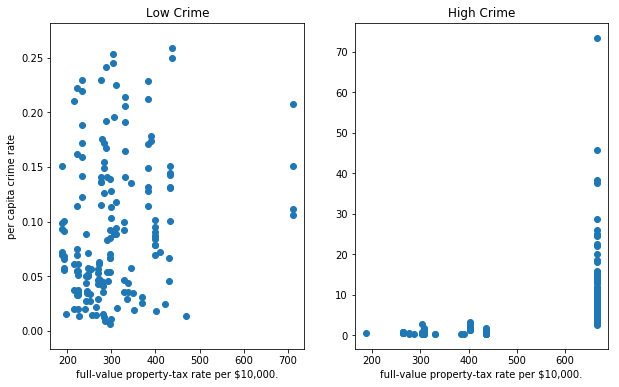

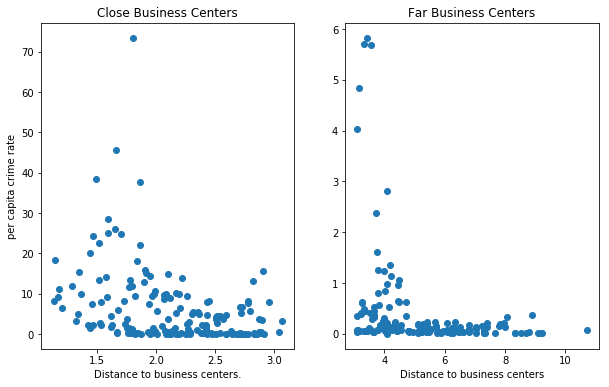

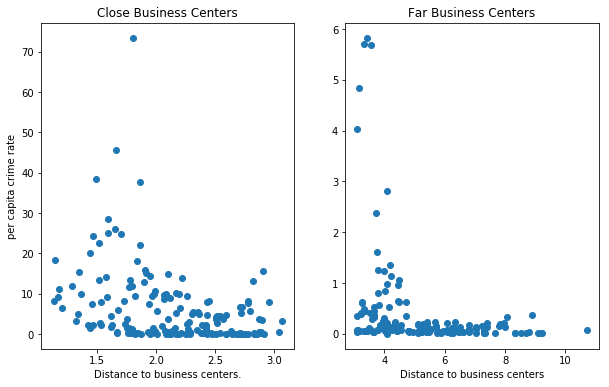

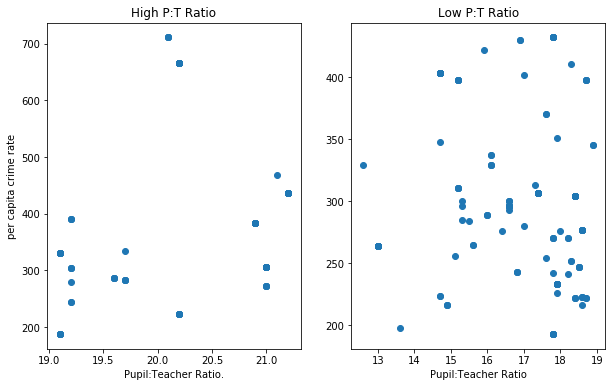

In [66]:
# * Next, use histograms and scatterplots to see whether you observe differences for the subsets of the data. 
# Make sure to use subplots so it is easy to compare the relationships.
fig1=plt.figure(figsize=[10,6])
f1_ax1=fig1.add_subplot(121)
f1_ax2=fig1.add_subplot(122)
f1_ax1.scatter(df_crim_low['tax'],df_crim_low['crim'])
f1_ax2.scatter(df_crim_hi['tax'],df_crim_hi['crim'])
f1_ax1.set_xlabel('full-value property-tax rate per $10,000.')
f1_ax2.set_xlabel('full-value property-tax rate per $10,000.')
f1_ax1.set_ylabel('per capita crime rate')
f1_ax1.set_title('Low Crime')
f1_ax2.set_title('High Crime')


fig2=plt.figure(figsize=[10,6])
f2_ax1=fig2.add_subplot(121)
f2_ax2=fig2.add_subplot(122)
f2_ax1.scatter(df_bus_close['dis'],df_bus_close['crim'])
f2_ax2.scatter(df_bus_far['dis'],df_bus_far['crim'])
f2_ax1.set_xlabel('Distance to business centers.')
f2_ax2.set_xlabel('Distance to business centers')
f2_ax1.set_ylabel('per capita crime rate')
f2_ax1.set_title('Close Business Centers')
f2_ax2.set_title('Far Business Centers')

fig2=plt.figure(figsize=[10,6])
f2_ax1=fig2.add_subplot(121)
f2_ax2=fig2.add_subplot(122)
f2_ax1.scatter(df_bus_close['dis'],df_bus_close['crim'])
f2_ax2.scatter(df_bus_far['dis'],df_bus_far['crim'])
f2_ax1.set_xlabel('Distance to business centers.')
f2_ax2.set_xlabel('Distance to business centers')
f2_ax1.set_ylabel('per capita crime rate')
f2_ax1.set_title('Close Business Centers')
f2_ax2.set_title('Far Business Centers')
#,kind='scatter')
#fig2=df_crim_hi.plot('tax','crim',kind='scatter')

fig3=plt.figure(figsize=[10,6])
f3_ax1=fig3.add_subplot(121)
f3_ax2=fig3.add_subplot(122)
f3_ax1.scatter(df_pt_high['ptratio'],df_pt_high['tax'])
f3_ax2.scatter(df_pt_low['ptratio'],df_pt_low['tax'])
f3_ax1.set_xlabel('Pupil:Teacher Ratio.')
f3_ax2.set_xlabel('Pupil:Teacher Ratio')
f3_ax1.set_ylabel('per capita crime rate')
f3_ax1.set_title('High P:T Ratio')
f3_ax2.set_title('Low P:T Ratio')
#ax1=df_crim_low.plot.scatter('tax','crim')
#fig2=df_crim_low['tax'].plot.hist(bins=20)#'tax') #,'crim',numbins=20)
#fig1.show()

# Variable Descriptions

This data frame contains the following columns:

#### crim  
per capita crime rate by town.

#### zn  
proportion of residential land zoned for lots over 25,000 sq.ft.

#### indus  
proportion of non-retail business acres per town.

#### chas  
Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).

#### nox  
nitrogen oxides concentration (parts per 10 million).

#### rm  
average number of rooms per dwelling.

#### age  
proportion of owner-occupied units built prior to 1940.

#### dis  
weighted mean of distances to five Boston employment centres.

#### rad  
index of accessibility to radial highways.

#### tax  
full-value property-tax rate per $10,000.

#### ptratio  
pupil-teacher ratio by town.

#### black  
1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.

#### lstat  
lower status of the population (percent).

#### medv  
median value of owner-occupied homes in $10000s.
  
  
  
Source
Harrison, D. and Rubinfeld, D.L. (1978) Hedonic prices and the demand for clean air. J. Environ. Economics and Management 5, 81–102.

Belsley D.A., Kuh, E. and Welsch, R.E. (1980) Regression Diagnostics. Identifying Influential Data and Sources of Collinearity. New York: Wiley.

## Summary

Congratulations, you've completed your first "freeform" exploratory data analysis of a popular data set!